In [124]:
import bt
import talib
import pandas as pd
import matplotlib.pyplot as plt

In [171]:
price_data=bt.get('dol.to',start='2024-01-12',end='2024-04-12')

[*********************100%%**********************]  1 of 1 completed


In [172]:
price_data

,dolto
Date,
2024-01-12,97.000000
2024-01-15,98.059998
2024-01-16,99.040001
2024-01-17,99.199997
2024-01-18,99.910004
...,...
2024-04-05,114.500000
2024-04-08,111.529999
2024-04-09,109.970001


In [173]:
sma=price_data.rolling(20).mean()

In [174]:
bt_strategy=bt.Strategy('AboveEMA',
                        [bt.algos.SelectWhere(price_data>sma),
                         bt.algos.WeighEqually(),
                         bt.algos.Rebalance()])
                         

In [175]:
bt_backtest=bt.Backtest(bt_strategy,price_data)
bt_result=bt.run(bt_backtest)

<Axes: title={'center': 'Backtest result'}>

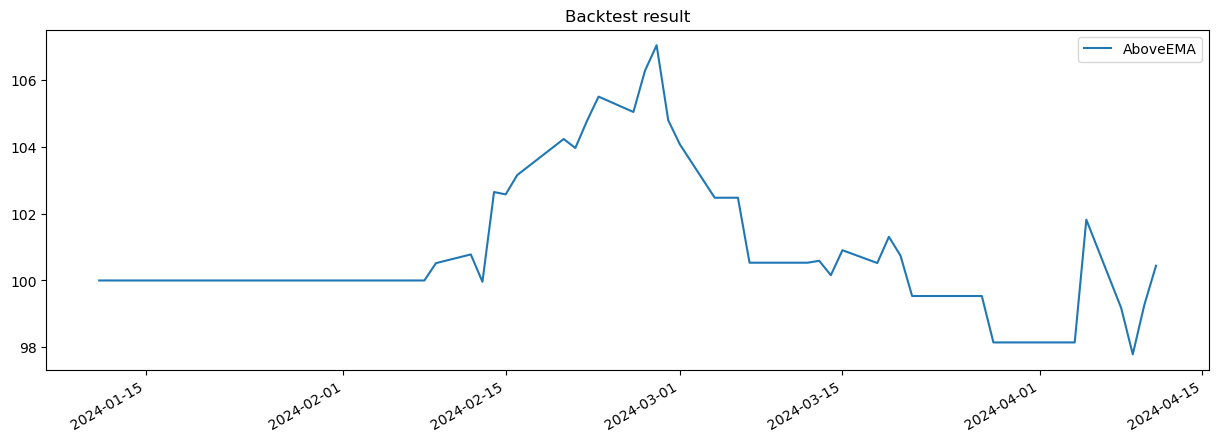

In [176]:
bt_result.plot(title='Backtest result')

In [28]:
df=pd.read_csv('USDCAD_2023-05-02.csv',index_col='date',parse_dates=['date']).dropna()

In [125]:
##trend stragtegy ema cross over
EMA_Short=talib.EMA(df['close'],timeperiod=10).to_frame()
EMA_Long=talib.EMA(df['close'],timeperiod=40).to_frame()

In [126]:
close=df.loc[:,['close']]

In [127]:
close

,close
date,
2023-05-02 00:00:00,1.36262
2023-05-03 00:00:00,1.36141
2023-05-04 00:00:00,1.35386
2023-05-05 00:00:00,1.33754
2023-05-08 00:00:00,1.33721
...,...
2024-03-27 00:00:00,1.35679
2024-03-28 00:00:00,1.35406
2024-03-29 00:00:00,1.35424


In [70]:
#creating the signal dataframe
signal = EMA_Long.copy()
signal[EMA_Long.isnull()]=0

In [71]:
#Construct the signal
signal[EMA_Short>EMA_Long]=1
signal[EMA_Short<EMA_Long]=-1

<Axes: xlabel='date'>

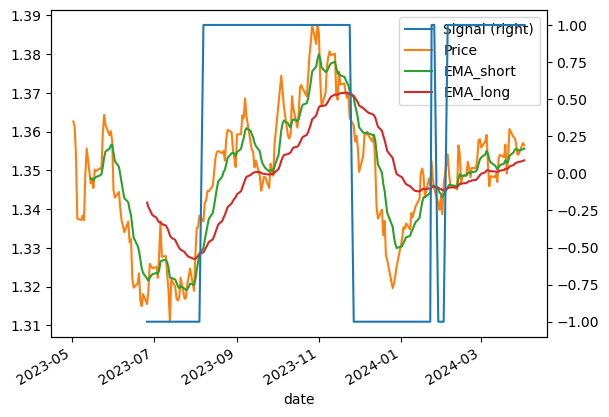

In [72]:
#Plot the signal, price and MAs

combined_df=bt.merge(signal,close,EMA_Short,EMA_Long)
combined_df.columns=['Signal','Price','EMA_short','EMA_long']
combined_df.plot(secondary_y=['Signal'])

In [73]:
bt_strategy2=bt.Strategy('EMA_crossover',
                        [bt.algos.WeighTarget(signal),
                         bt.algos.Rebalance()])

In [101]:
signal.columns = ['signal']


In [106]:
EMA_Short.columns = ['EMA_Short']


In [108]:
EMA_Long.columns = ['EMA_Long']


In [112]:
result1 = pd.merge(signal,close, on="date")

In [113]:
result2 = pd.merge(EMA_Long,EMA_Short, on='date')

In [118]:
dataframes= pd.merge(result1,result2, on='date')

In [164]:
signal

,signal
date,
2023-05-02,NaN
2023-05-03,NaN
2023-05-04,NaN
2023-05-05,NaN
2023-05-08,NaN
...,...
2024-03-27,1.0
2024-03-28,1.0
2024-03-29,1.0


Text(0, 0.5, 'Signal')

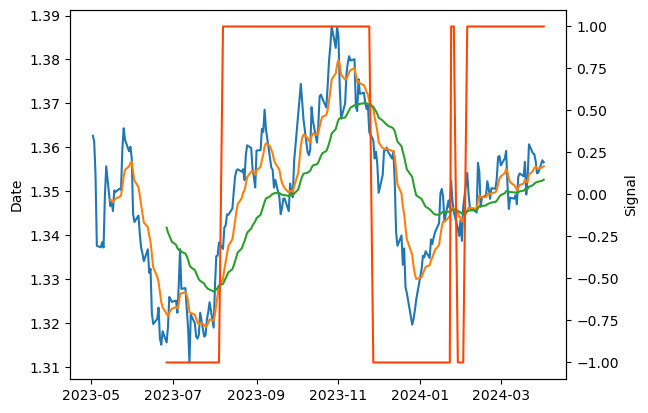

In [159]:
fig, ax1=plt.subplots()
ax1.plot(dataframes['close'])
ax1.plot(dataframes['EMA_Short'])
ax1.plot(dataframes['EMA_Long'])
ax1.set_ylabel('Date')
ax2=ax1.twinx()
ax2.plot(dataframes['signal'],color='orangered');
ax2.set_ylabel('Signal')



Text(0, 0.5, 'Signal')

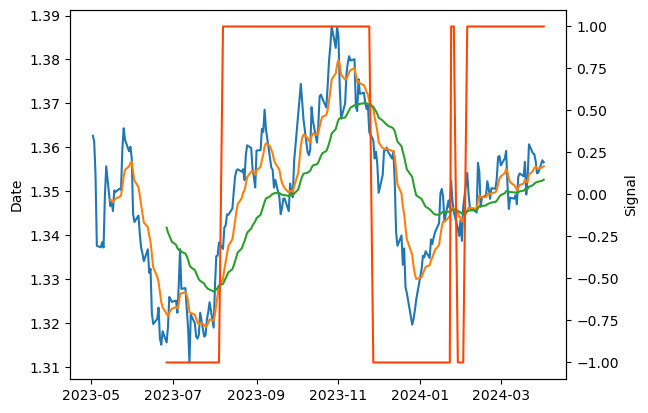

In [159]:
fig, ax1=plt.subplots()
ax1.plot(dataframes['close'])
ax1.plot(dataframes['EMA_Short'])
ax1.plot(dataframes['EMA_Long'])
ax1.set_ylabel('Date')
ax2=ax1.twinx()
ax2.plot(dataframes['signal'],color='orangered');
ax2.set_ylabel('Signal')



In [161]:
bt_strategy2=bt.Strategy('EMA_crossover',
                        [bt.algos.WeighTarget(signal),
                         bt.algos.Rebalance()])


In [162]:
bt_backtest2=bt.Backtest(bt_strategy2,close)
bt_result2=bt.run(bt_backtest2)

TypeError: unsupported operand type(s) for -: 'str' and 'DateOffset'